# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | kauhajoki
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | tres pontas
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 10 of Set 1 | misratah
Processing Record 11 of Set 1 | rio branco
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | sines
Processing Record 16 of Set 1 | krasnokamensk
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | shingu
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | salalah
Proces

Processing Record 35 of Set 4 | belton
Processing Record 36 of Set 4 | yorkton
Processing Record 37 of Set 4 | qaanaaq
Processing Record 38 of Set 4 | palana
Processing Record 39 of Set 4 | general roca
Processing Record 40 of Set 4 | lasa
Processing Record 41 of Set 4 | santa isabel do rio negro
Processing Record 42 of Set 4 | wahiawa
Processing Record 43 of Set 4 | satun
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | stephenville
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | bodden town
Processing Record 0 of Set 5 | bluff
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 4 of Set 5 | maralal
Processing Record 5 of Set 5 | mezen
Processing Record 6 of Set 5 | ilabaya
Processing Record 7 of Set 5 | aswan
Processing Record

Processing Record 21 of Set 8 | bridlington
Processing Record 22 of Set 8 | saleilua
City not found. Skipping...
Processing Record 23 of Set 8 | adrar
Processing Record 24 of Set 8 | coahuayana
Processing Record 25 of Set 8 | jalu
Processing Record 26 of Set 8 | cabrobo
Processing Record 27 of Set 8 | la ronge
Processing Record 28 of Set 8 | sola
Processing Record 29 of Set 8 | calbuco
Processing Record 30 of Set 8 | sirjan
Processing Record 31 of Set 8 | stirling
Processing Record 32 of Set 8 | voznesenye
Processing Record 33 of Set 8 | mehamn
Processing Record 34 of Set 8 | langsa
Processing Record 35 of Set 8 | kumano
Processing Record 36 of Set 8 | shakiso
Processing Record 37 of Set 8 | saint-louis
Processing Record 38 of Set 8 | mujiayingzi
Processing Record 39 of Set 8 | meyungs
City not found. Skipping...
Processing Record 40 of Set 8 | pouebo
Processing Record 41 of Set 8 | swift current
Processing Record 42 of Set 8 | carnarvon
Processing Record 43 of Set 8 | sfantu gheorghe


Processing Record 8 of Set 12 | bongandanga
Processing Record 9 of Set 12 | shakawe
Processing Record 10 of Set 12 | weinan
Processing Record 11 of Set 12 | garowe
Processing Record 12 of Set 12 | la paz
Processing Record 13 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 12 | lewiston
Processing Record 15 of Set 12 | maisach
Processing Record 16 of Set 12 | barbar
City not found. Skipping...
Processing Record 17 of Set 12 | coquimbo
Processing Record 18 of Set 12 | olafsvik
City not found. Skipping...
Processing Record 19 of Set 12 | okha
Processing Record 20 of Set 12 | fomboni
Processing Record 21 of Set 12 | malatya
Processing Record 22 of Set 12 | fagersta
Processing Record 23 of Set 12 | pryyutivka
Processing Record 24 of Set 12 | broken hill
Processing Record 25 of Set 12 | maniitsoq
Processing Record 26 of Set 12 | staryy nadym
Processing Record 27 of Set 12 | morondava
Processing Record 28 of Set 12 | batticaloa
Processing Record 29 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,0,AU,1566356075,35,-33.64,115.35,70.00,23.44
1,kauhajoki,0,FI,1566356075,100,62.43,22.18,54.00,5.82
2,rikitea,0,PF,1566356075,78,-23.12,-134.97,72.44,6.55
3,alofi,40,NU,1566356075,74,-19.06,-169.92,82.40,6.93
4,tres pontas,0,BR,1566356076,93,-21.37,-45.51,60.20,2.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

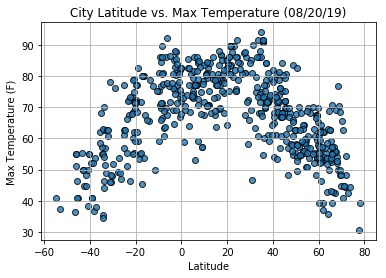

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

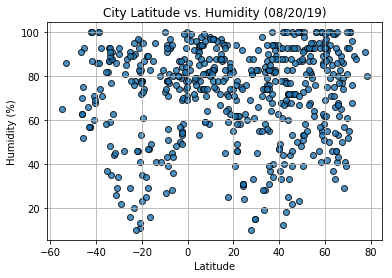

In [7]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

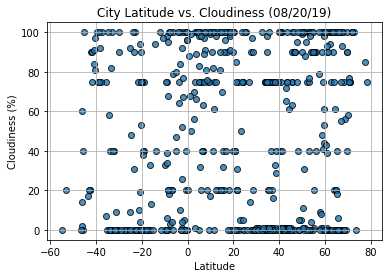

In [8]:
# Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

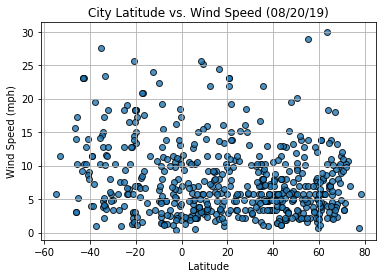

In [9]:
# Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()
